# ANALYZING POLICE ACTIVITY WITH PANDAS

## Preparing te data for analysis 

### Stanford Open Policing Project dataset 

Introduction to the dataset
- Trac stops by police officers
- Download data for any state:
    - hps://openpolicing.stanford.edu/ (31 states full data. our is only a partition)

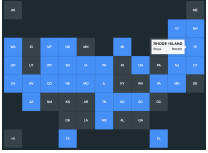

Preparing the data
- Examine the data
- Clean the data

In [ ]:
import pandas as pd
ri = pd.read_csv('police.csv')
ri.head(3)

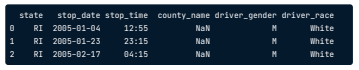

- Each row represents one traffic stop
- NaN indicates a missing value

Locating missing values

In [ ]:
ri.isnull()

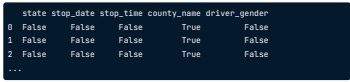

In [ ]:
ri.isnull().sum()

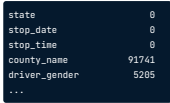

- .sum() calculates the sumof each column
- True = 1 , False = 0

Dropping a column

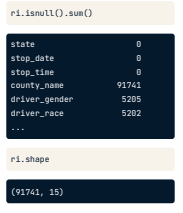

- county_name column only contains missing values
- Drop county_name using the .drop() method

In [ ]:
ri.drop('county_name',
        axis='columns', 
        inplace=True)

Dropping rows
- .dropna() : Drop rows based on the presence of missing values

In [ ]:
ri.head()

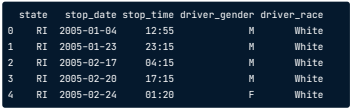

In [ ]:
ri.dropna(subset=['stop_date','stop_time'], 
          inplace=True)

In [ ]:
#Example
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv("police.csv")

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

In [ ]:
#Example
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(["county_name", "state"], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

In [ ]:
#Example
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=["driver_gender"], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

### Using proper data types 

Examining the data types

In [ ]:
ri.dtypes

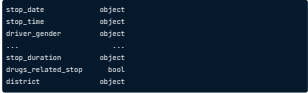

- object : Python strings (or other Python objects, such as lists)
- bool : True and False values
- Other types: int , float , datetime , category (categorical variables)

Why do data types matter?
- Aects which operations you can perform
- Avoid storing data as strings (when possible)
    - int , float : enables mathematical operations
    - datetime : enables date-based aributes and methods
    - category : uses less memory and runs faster
    - bool : enables logical and mathematical operations

Fixing a data type

In [ ]:
apple
apple.price.dtype #the 'o' represents numbers stored as str

apple['price'] = apple.price.astype('float')
apple.price.dtype

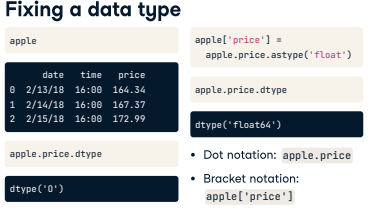

- Dot notation: apple.price (more readable)
- Bracket notation: apple['price']

In [ ]:
#Example
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

### Creating a DatetimeIndex 

Using datetime format

In [ ]:
ri.head(3)

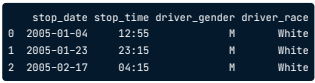

In [ ]:
ri.dtypes

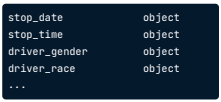

1. Combine stop_date and stop_ time into one column
2. Convert it to datetime format

#### str.cat() 

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html

Combining object columns
- first replace the / to - (adjust format)
- use the str.cat() method to concatenate both columns

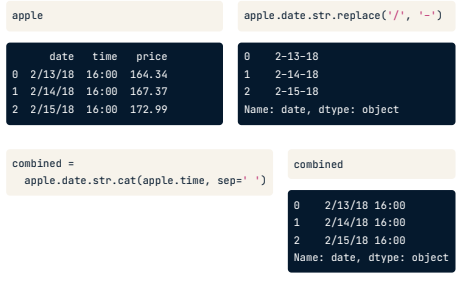

Converting to datetime forma

In [ ]:
apple['date_and_time'] = pd.to_datetime(combined)
apple

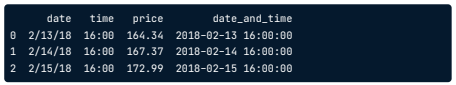

In [ ]:
apple.dtypes

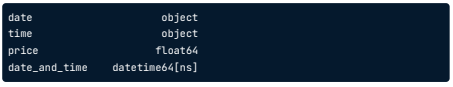

Setting the index

In [ ]:
apple.set_index('date_and_time', inplace=True)
apple

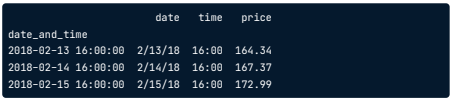

In [ ]:
apple.index

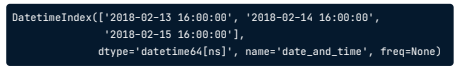

In [ ]:
#Example
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = " ")

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

In [ ]:
#Example
# Set 'stop_datetime' as the index
ri.set_index("stop_datetime", inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

## Exploring the relationship between gender and policing 

### Do the genders commit different violations?

Counting unique values (1)
- .value_counts() : Counts the unique values in a Series
- Best suited for categorical data

In [ ]:
ri.stop_outcome.value_counts()

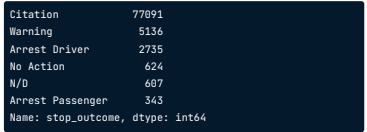

In [ ]:
ri.stop_outcome.value_counts().sum()
#output: 86536

In [ ]:
ri.shape
#output: (86536, 13)

Expressing counts as proportions

In [ ]:
ri.stop_outcome.value_counts(normalize=True)

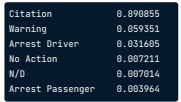

Filtering DataFrame rows

In [ ]:
ri.driver_race.value_counts()

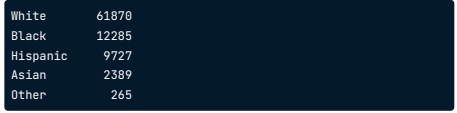

In [ ]:
white = ri[ri.driver_race == 'White']
white.shape
#output: (61870, 13)

Comparing stop outcomes for two groups

In [ ]:
white.stop_outcome.value_counts(normalize=True)

asian = ri[ri.driver_race =='Asian']
asian.stop_outcome.value_counts(normalize=True)

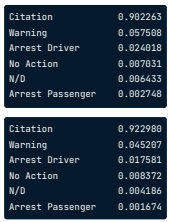

In [ ]:
#Example
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize = True))

In [ ]:
#Example
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == "F"]

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == "M"]

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))

### Does gender affect who gets a ticker for speeding? 

Filtering by multiple conditions (1)

In [ ]:
female = ri[ri.driver_gender == 'F']
female.shape
#output: (23774, 13)

Filtering by multiple conditions (2)

In [ ]:
female_and_arrested = ri[(ri.driver_gender == 'F') &
                         (ri.is_arrested == True)]


- Each condition is surrounded by parentheses
- Ampersand ( & ) represents the and operator

In [ ]:
female_and_arrested.shape
#output: (669, 13)

- Only includes female drivers who were arrested

Filtering by multiple conditions (3)

In [ ]:
female_or_arrested = ri[(ri.driver_gender == 'F') |
                        (ri.is_arrested == True)]

Pipe ( | ) represents the or operator

In [ ]:
female_or_arrested.shape
#output: (26183, 13)

- Includes all females
- Includes all drivers who were arrested

Rules for filtering by multiple conditions
- Ampersand ( & ): only include rows that satisfy both
conditions
- Pipe ( | ): include rows that satisfy either condition
- Each condition must be surrounded by parentheses
- Conditions can check for equality ( == ), inequality ( != ), etc.
- Can use more than two conditions

Correlation, not causation
- Analyze the relationship between gender and stop outcome
    - Assess whether there is a correlation
- Not going to draw any conclusions about causation
    - Would need additional data and expertise
    - Exploring relationships only (between attributes)

In [ ]:
#Example
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == "F") &
(ri.violation == "Speeding")]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == "M") &
(ri.violation == "Speeding")]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize = True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

### Does gender affect whose vehicle is searched? 

Math with Boolean values

In [ ]:
ri.isnull().sum()

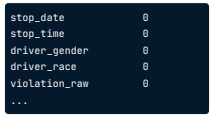

- True = 1, False = 0
- Mean of Boolean Series represents percentage of True values

In [ ]:
import numpy as np
np.mean([0, 1, 0, 0])
#output: 0.25

np.mean([False, True, False, False])
#output: 0.25

Taking the mean of a Boolean Series

In [ ]:
ri.is_arrested.value_counts(normalize=True)

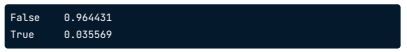

In [ ]:
ri.is_arrested.mean()
#output: 0.0355690117407784

ri.is_arrested.dtype
#output: dtype('bool')

Comparing groups using groupby (1)
- Study the arrest rate by police district

ri.district.unique()

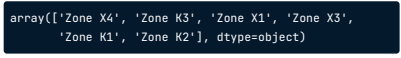

In [ ]:
ri[ri.district == 'Zone K1'].is_arrested.mean()
#output: 0.024349083895853423

Comparing groups using groupby (2)

In [ ]:
ri[ri.district == 'Zone K2'].is_arrested.mean()
#output: 0.030800588834786546

ri.groupby('district').is_arrested.mean()

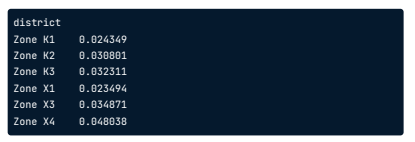

Grouping by multiple categories

In [ ]:
ri.groupby(['district','driver_gender']).is_arrested.mean()

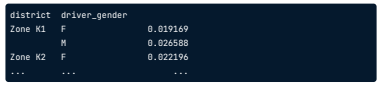

In [ ]:
ri.groupby(['driver_gender','district']).is_arrested.mean()

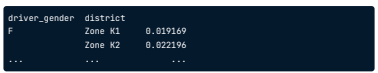

In [ ]:
#Example
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize = True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

In [ ]:
#Example
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == "F"].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender == "M"].search_conducted.mean())

# Calculate the search rate for both groups simultaneously
print(ri.groupby("driver_gender").search_conducted.mean())

In [ ]:
#Example
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(["driver_gender", "violation"]).search_conducted.mean())

# Reverse the ordering to group by violation before gender
print(ri.groupby(["violation", "driver_gender"]).search_conducted.mean())

### Does gender affect who is frisked during a search? 

In [ ]:
ri.search_conducted.value_counts()

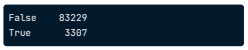

In [ ]:
ri.search_type.value_counts(dropna=False) 
#when a search is not conducted, there is no information to to record about the search

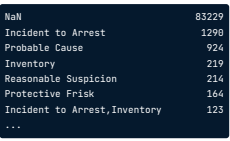

- .value_counts() excludes missing values by default
- dropna=False displays missing values

Examining the search types

In [ ]:
ri.search_type.value_counts()

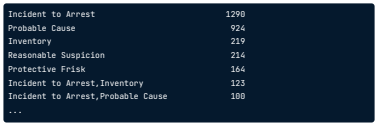

- Multiple values are separated by commas
- 219 searches in which "Inventory" was the only search type
- Locate "Inventory" among multiple search types

Searching for a string (1)

In [ ]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

- str.contains() returns True if string is found, False if not found
- na=False returns False when it finds a missing value

Searching for a string (2)

In [ ]:
ri.inventory.dtype
#output: dtype('bool')

True means inventory was done, False means it was not

In [ ]:
ri.inventory.sum()
#output: 441

Calculating the inventory rate

In [ ]:
ri.inventory.mean()
#output: 0.0050961449570121106

- 0.5% of all trac stops resulted in an inventory

In [ ]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()
#output: 0.13335349259147264

13.3% of searches included an inventory

In [ ]:
#Example
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

In [ ]:
#Example
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby("driver_gender").frisk.mean())

## Visual exploratory data analysis 

### Does time of day affect arrest rate? 

Analyzing datetime data

In [ ]:
apple

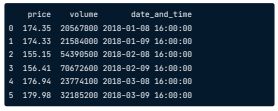

Accessing datetime attributes (1)

In [ ]:
apple.dtypes

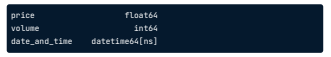

In [ ]:
apple.date_and_time.dt.month

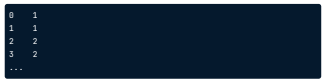

Accessing datetime attributes (2)

In [ ]:
apple.set_index('date_and_time', inplace=True)
apple.index

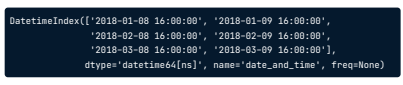

In [ ]:
apple.index.month

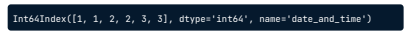

- dt accessor is not used with a DatetimeIndex

Calculating the monthly mean price

In [ ]:
apple.price.mean()
#output: 169.52666666666667

In [ ]:
apple.groupby(apple.index.month).price.mean()

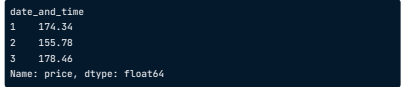

In [ ]:
monthly_price = apple.groupby(apple.index.month).price.mean()

Plotting the monthly mean price

In [ ]:
import matplotlib.pyplot as plt

monthly_price.plot()

#Line plot: Series index on x-axis, Series values on y-axis

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')
plt.show()

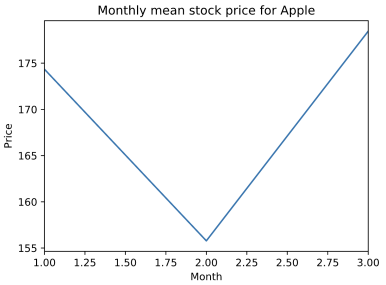

In [ ]:
#Example
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# Display the plot
plt.show()

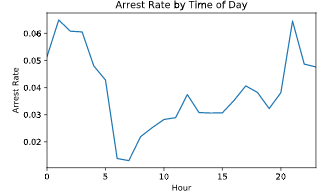

### Are drug-related stops on the rise? 

Resampling the price

In [ ]:
apple.groupby(apple.index.month).price.mean()

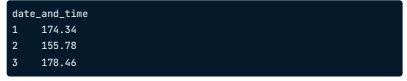

In [ ]:
apple.price.resample('M').mean()

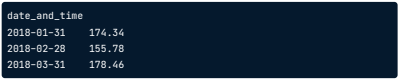

Resampling the volume

In [ ]:
apple

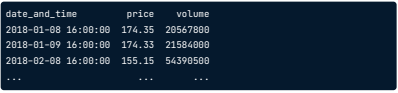

In [ ]:
apple.volume.resample('M').mean()

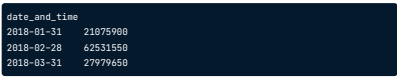

Concatenating price and volume

In [ ]:
monthly_price = apple.price.resample('M').mean()
monthly_volume = apple.volume.resample('M').mean()
pd.concat([monthly_price, monthly_volume], axis='columns')

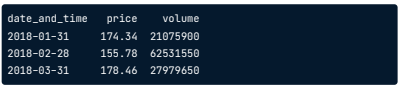

In [ ]:
monthly = pd.concat([monthly_price, monthly_volume], axis='columns')

Plotting price and volume (1)

In [ ]:
monthly.plot()
plt.show()

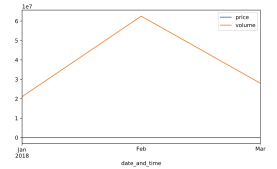

Plotting price and volume (2)

In [ ]:
monthly.plot(subplots=True)
plt.show()

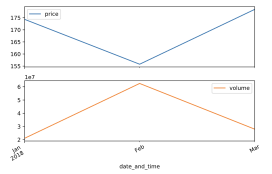

In [ ]:
#Example
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample("A").mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

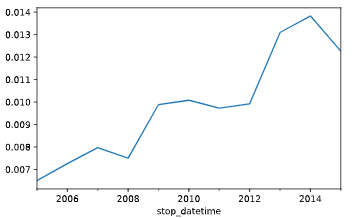

In [ ]:
#Example
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample("A").mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis="columns")

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

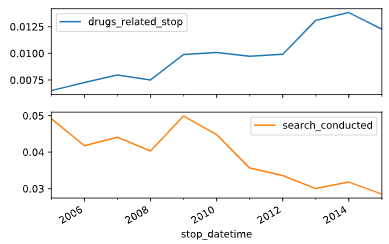

### What violations are caught in each district? 

Computing a frequency table

In [ ]:
pd.crosstab(ri.driver_race,
            ri.driver_gender)

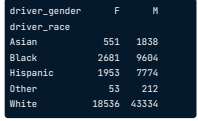

- Frequency table: Tally of how many times each combination of values occurs

In [ ]:
ri[(ri.driver_race == 'Asian') &
   (ri.driver_gender == 'F')
  ].shape
#output: (551, 14)

- driver_race is along theindex, driver_gender isalong the columns

table = pd.crosstab(
        ri.driver_race,
        ri.driver_gender)

Selecting a DataFrame slice
- loc[] accessor: Select from a DataFrame by label

In [ ]:
table

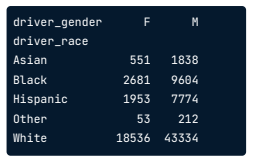

In [ ]:
table.loc['Asian':'Hispanic']

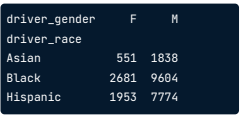

In [ ]:
table = table.loc['Asian':'Hispanic']

In [ ]:
# Creating a line plot
table.plot()
plt.show()

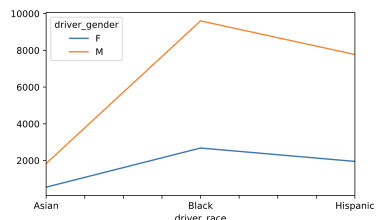

In [ ]:
# Creating a bar plot
table.plot(kind='bar')
plt.show()

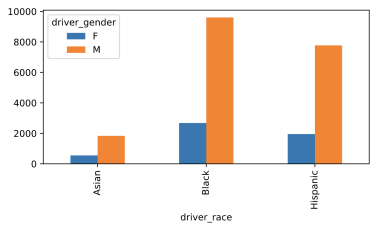

In [ ]:
# Stacking the bars 
table.plot(kind='bar', stacked=True)
plt.show()

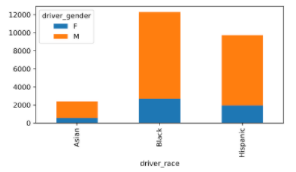

In [ ]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc["Zone K1":"Zone K3"])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc["Zone K1":"Zone K3"]

In [ ]:
#Example 2
# Create a bar plot of 'k_zones'
k_zones.plot(kind = "bar")

# Display the plot
plt.show()

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = "bar", stacked = True)

# Display the plot
plt.show()

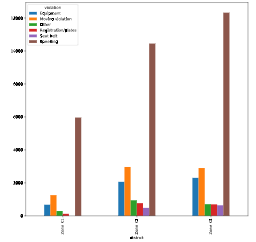

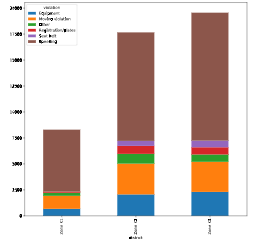

### How long might you be stopped for a violation? 

Analyzing an object column

In [ ]:
apple

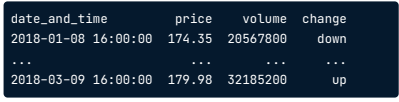

- Create a Boolean column: True if the price went up, and False otherwise
- Calculate how often the price went up by taking the column mean

In [ ]:
apple.change.dtype
#output: dtype('O')

- .astype() can't be used in this case

Mapping one set of values to another
- Dictionary maps the values you have to the values you want

In [ ]:
mapping = {'up':True,'down':False}
apple['is_up'] = apple.change.map(mapping) #why note use replace?
apple

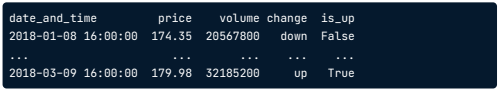

In [ ]:
apple.is_up.mean()
#output: 0.5

Calculating the search rate
- Visualize how often searches were done aer each violation type

In [ ]:
ri.groupby('violation').search_conducted.mean()

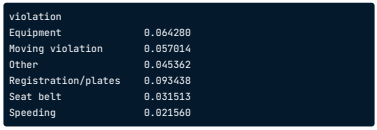

In [ ]:
search_rate = ri.groupby('violation').search_conducted.mean()

Creating a bar plot

In [ ]:
search_rate.plot(kind='bar')
plt.show()

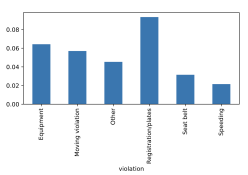

Ordering the bars (1)
- Order the bars from le to right by size

In [ ]:
search_rate.sort_values()

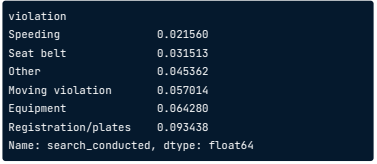

Ordering the bars (2)

In [ ]:
search_rate.sort_values().plot(kind='bar')
plt.show()

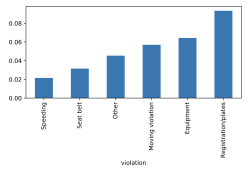

In [ ]:
# Rotating the bars
search_rate.sort_values().plot(kind='barh')
plt.show() #easy to read the label

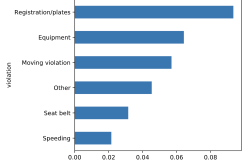

In [ ]:
#Example
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

In [ ]:
#Example
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby("violation_raw").stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = "barh")

# Display the plot
plt.show()

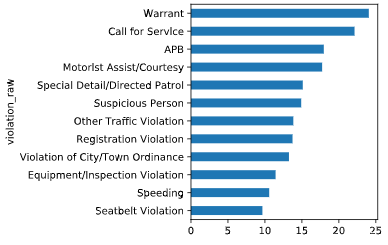

## Analyzing the effect of weather on policing 

### Exploring the weather dataser 

In [ ]:
weather = pd.read_csv('weather.csv')
weather.head(3)

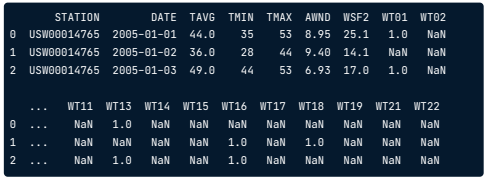

- TAVG , TMIN , TMAX : Temperature
- AWND , WSF2 : Wind speed
- WT01 ... WT22 : Bad weather conditions

Examining the wind speed

In [ ]:
weather[['AWND', 'WSF2']].head()
weather[['AWND', 'WSF2']].describe() #is data trustworthy?

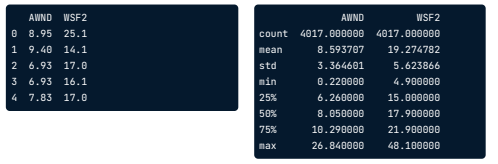

In [ ]:
# Creating a box plot
weather[['AWND','WSF2']].plot(kind='box')
plt.show()

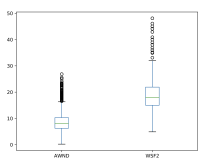

In [ ]:
# Creating a histogram (1)
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

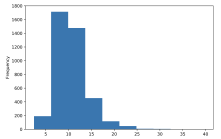

In [ ]:
# Creating a histogram (2)
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

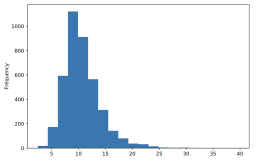

In [ ]:
#Example
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv("weather.csv")

# Describe the temperature columns
print(weather[["TMIN", "TAVG", "TMAX"]].describe())

# Create a box plot of the temperature columns
weather[["TMIN", "TAVG", "TMAX"]].plot(kind='box')

# Display the plot
plt.show()

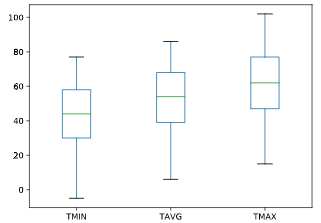

In [ ]:
#Example
# Create a 'TDIFF' column that represents temperature difference
weather["TDIFF"] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = "hist", bins = 20)

# Display the plot
plt.show()

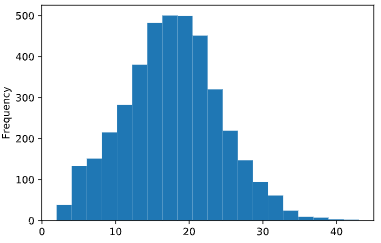

### Categorizing the weather 

Selecting a DataFrame slice (1)

In [ ]:
weather.shape
#output: (4017, 28)

In [ ]:
weather.columns

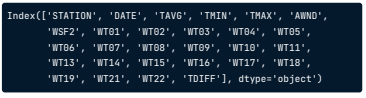

Selecting a DataFrame slice (2)

In [ ]:
temp = weather.loc[:,'TAVG':'TMAX']
temp.shape
#output: (4017, 3)

temp.columns
#output: Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')

DataFrame operations

In [ ]:
temp.head()
temp.sum()
temp.sum(axis='columns').head() #aggregate the columns to show the rows

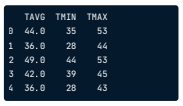

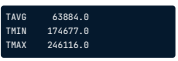

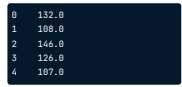

Mapping one set of values to another

In [ ]:
ri.stop_duration.unique()
#array(['0-15 Min','16-30 Min','30+ Min'], dtype=object)

mapping = {'0-15 Min':'short',
           '16-30 Min':'medium',
           '30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype
#output: dtype('O')

Changing data type from object to category (1)

In [ ]:
ri.stop_length.unique()
#output: array(['short','medium','long'], dtype=object)

- Category type stores the data more efficiently
- Allows you to specify a logical order for the categories

In [ ]:
ri.stop_length.memory_usage(deep=True)
#output: 8689481 (8 Mgb)

Changing data type from object to category (2)

In [ ]:
cats = ['short','medium','long']

ri['stop_length'] = ri.stop_length.astype('category',
                                          ordered=True,
                                          categories=cats) #defines the order

ri.stop_length.memory_usage(deep=True)

#output: 3400602 (3mb)

As it is ordered, it is possible to make comparative operations with the column

Using ordered categories (1)

In [ ]:
ri.stop_length.head()

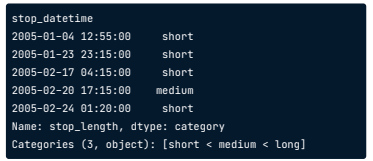

Using ordered categories (2)

In [ ]:
ri[ri.stop_length > 'short'].shape
#output: (16959, 16)

In [ ]:
ri.groupby('stop_length').is_arrested.mean() #logically instead of alphabetically

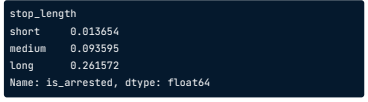

In [ ]:
#Example
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,"WT01":"WT22"]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = "columns")

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind = "hist")

# Display the plot
plt.show()

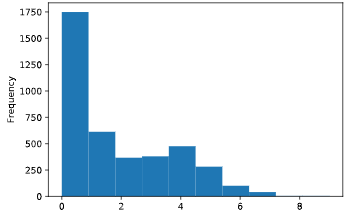

In [ ]:
#Example
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3: "bad", 4: "bad", 5:"worse", 6:"worse", 7: "worse", 8:"worse", 9:"worse" }

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

In [ ]:
#Example
# Create a list of weather ratings in logical order
cats = ["good", "bad", "worse"]

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype("category", ordered=True, categories = cats)

# Examine the head of 'rating'
print(weather.rating.head())

### Merging datasets 

In [ ]:
apple

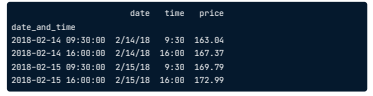

In [ ]:
apple.reset_index(inplace=True)
apple

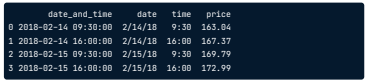

Preparing the second DataFrame

In [ ]:
high_low

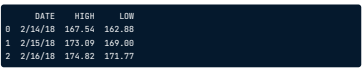

In [ ]:
high = high_low[['DATE', 'HIGH']]
high

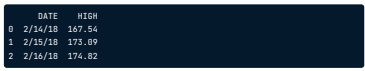

Merging the DataFrames

In [ ]:
apple_high = pd.merge(left=apple, 
                      right=high,
                      left_on='date', 
                      right_on='DATE',
                      how='left')

- left=apple : Le DataFrame
- right=high : Right DataFrame
- left_on='date' : Key column in le DataFrame
- right_on='DATE' : Key column in right DataFrame
- how='left' : Type of join

In [ ]:
apple_high
apple
high

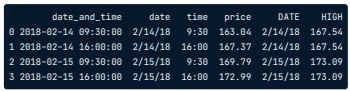

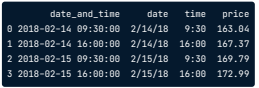

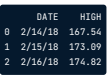

Setting the index

In [ ]:
apple_high.set_index('date_and_time', inplace=True)
apple_high

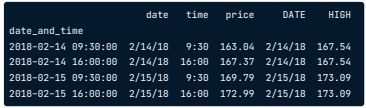

In [ ]:
#Example
# Reset the index of 'ri'
ri.reset_index(inplace = True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[["DATE", "rating"]]

# Examine the head of 'weather_rating'
print(weather_rating.head())

In [ ]:
#Example
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

### Does weather affect the arrest rate? 

Driver gender and vehicle searches

In [ ]:
ri.search_conducted.mean()
#output: 0.0382153092354627

ri.groupby('driver_gender').search_conducted.mean()

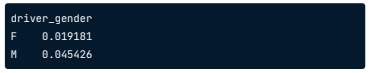

In [ ]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()

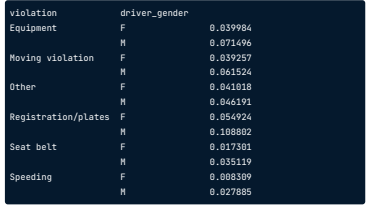

In [ ]:
search_rate = ri.groupby(['violation',
                          'driver_gender']).search_conducted.mean()
search_rate

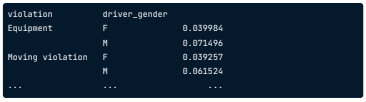

In [ ]:
type(search_rate)
type(search_rate.index) #they are not columns, just indexes

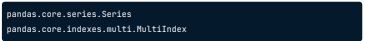

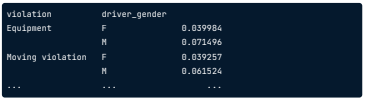

In [ ]:
search_rate.loc['Equipment']

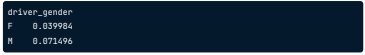

In [ ]:
search_rate.loc['Equipment','M']
#output: 0.07149643705463182

Converting a multi-indexed Series to a DataFrame

In [ ]:
search_rate.unstack()

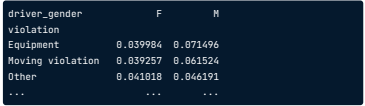

In [ ]:
type(search_rate.unstack())
#pandas.core.frame.DataFrame

Converting a multi-indexed Series to a DataFrame

In [ ]:
ri.pivot_table(index='violation'
               ,columns='driver_gender',
               values='search_conducted')


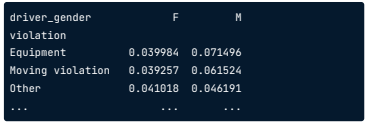

In [ ]:
#Example
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc["Moving violation", "bad"])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc["Speeding"])

In [ ]:
#Example
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

### Conclusion 

Stanford Open Policing Project

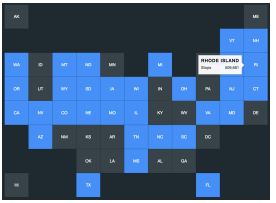

- Download data: hps://openpolicing.stanford.edu/